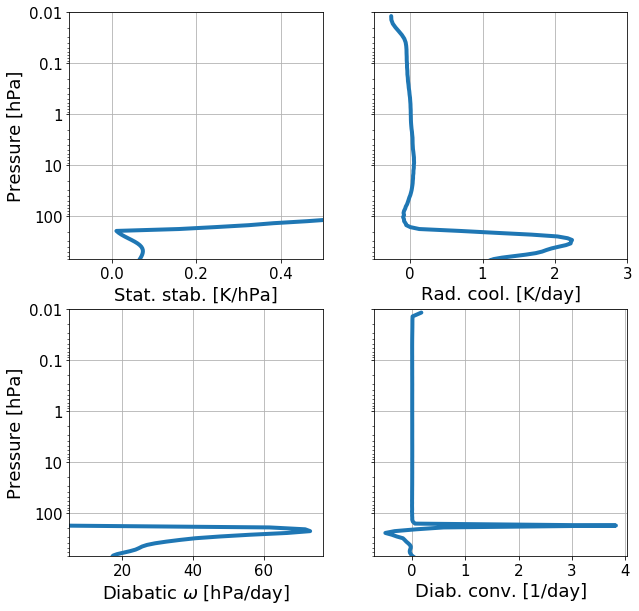

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import conrad
import typhon


plt.style.use(typhon.plots.styles('typhon'))
plt.rc('lines', lw=4)

ncfile = conrad.utils.get_filepath(
    atmosphere='rce-reference-norh',
    experiment='scale-co2-norh',
    scale='8',
)
ncfile = 'results/test.nc'

plotfunc = typhon.plots.profile_p_log
timestep = -1
pmax = 700e2
pmin = 80e2
pmin = 0.01e2

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10, 10))
axes = axes.flat

dataset = netCDF4.Dataset(ncfile)
# timesteps = range(0, dataset.dimensions['time'].size, 100)
timesteps = [-1]
    
for timestep in timesteps:
    atmosphere = conrad.atmosphere.Atmosphere.from_netcdf(ncfile, timestep)

    Qr = dataset.variables['net_htngrt'][timestep, :]

    plev = atmosphere['plev'].values
    t = atmosphere['T'].values[0, :]
    theta = atmosphere.get_potential_temperature()
    sigma = atmosphere.get_static_stability()
    omega = atmosphere.get_diabatic_subsidence(Qr)
    omega_conv = np.diff(omega) / np.diff(plev[:-1])


    plotfunc(plev[:-1], sigma * 100, ax=axes[0])
    axes[0].grid(True)
    axes[0].set_xlim(-0.1, 0.5)
    axes[0].set_ylim(bottom=pmax, top=pmin)
    axes[0].set_xlabel('Stat. stab. [K/hPa]')

    plotfunc(plev[:-1], -Qr[:-1], ax=axes[1])
    axes[1].grid(True)
    axes[1].set_ylim(bottom=pmax, top=pmin)
    axes[1].set_xlabel('Rad. cool. [K/day]')
    axes[1].set_xlim(-0.5, 3)


    plotfunc(plev[:-1], omega / 100, ax=axes[2])
    axes[2].grid(True)
    axes[2].set_xlim(left=5)
    axes[2].set_ylim(bottom=pmax, top=pmin)
    axes[2].set_xlabel('Diabatic $\omega$ [hPa/day]')


    # axes[3].axhline(atmosphere.get_subsidence_convergence_max(Qr), c='r')
    plotfunc(plev[1:-1], omega_conv, ax=axes[3])
    axes[3].grid(True)
    axes[3].set_ylim(bottom=pmax, top=pmin)
    axes[3].set_xlabel('Diab. conv. [1/day]')

# fig.savefig('plots/subsidence_convergence.pdf')